In [2]:
import os
import nmrglue as ng
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
# Figure for DNP enhencement
# data directory : enhencament 1H cdse 408 nm folder 211 /201   13Cd  cdse 350 folder  
## Cd 408 nm DP-315 CP -314 
# cdse 350nm DP cp
# Cd T1
# Cd Buildup curve
# two different CP time  CdSe350 folder 67 68
# CP time array folder 224 


In [14]:
#process the first half reversed echo
em_data2=ng.process.proc_base.em(data1_raw[0:512], lb=0.005, inv=False, rev=False)
zero_fill2=ng.process.proc_base.zf(em_data2, pad=512, mid=False)
postcorr_frq2 = ng.proc_base.fft(zero_fill2)
#intearctive phase
ng.process.proc_autophase.manual_ps(postcorr_frq2,notebook=True)
#write the correct phase to spectrum
#phased_data2 = ng.proc_base.ps(postcorr_frq2, p0=-72, p1=0)

interactive(children=(FloatSlider(value=-0.0015926535897929917, description='phcorr0', max=3.141592653589793, …

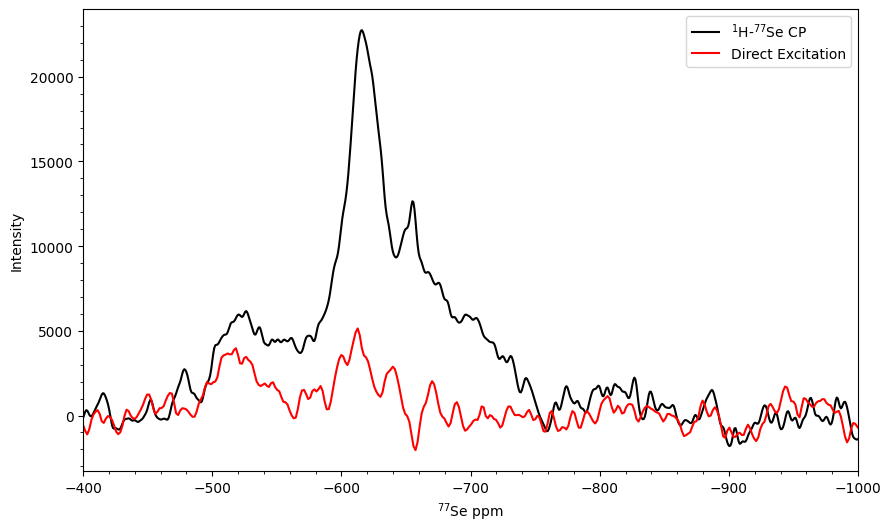

In [11]:
#se NMR data prepare
#se cp ( 317, ns=2k

#Dp(318, ns=2k)
bas_dir=os.path.dirname('/Users/yunyao_1/Documents/Experiments_Data/data/CdSe_DNP/Yunyao')
path1_list = ['Yunyao','317','pdata','1']
data_path1 = os.path.join(bas_dir, *path1_list)
path2_list = ['Yunyao','318','pdata','1']
data_path2 = os.path.join(bas_dir, *path2_list)
#print(data_path)

dic1, data1=ng.bruker.read_pdata(data_path1)
dic2, data2=ng.bruker.read_pdata(data_path2)
udic1=ng.bruker.guess_udic(dic1,data1)
uc1=ng.fileiobase.uc_from_udic(udic1)
ppm1=uc1.ppm_scale()
udic2=ng.bruker.guess_udic(dic2,data2)
uc2=ng.fileiobase.uc_from_udic(udic2)
ppm2=uc2.ppm_scale()


fig,ax=plt.subplots(figsize=(10, 6))
ax.plot(ppm1,data1,'k-',label='$^{1}$H-$^{77}$Se CP')
ax.plot(ppm2,data2,'r-',label='Direct Excitation')

ax.set_xlabel('$^{77}$Se ppm')
ax.set_ylabel("Intensity")
ax.minorticks_on()  # Enable minor ticks on both x and y axes
#ax.set_title("Top Values from Each Group")
ax.set_xlim(-400, -1000)
plt.legend()
#plt.grid(True)
plt.show()
fig.savefig('/Users/yunyao_1/Dropbox/CdSe-data-owen/Figures/Se_DPVSCP_plot.pdf')

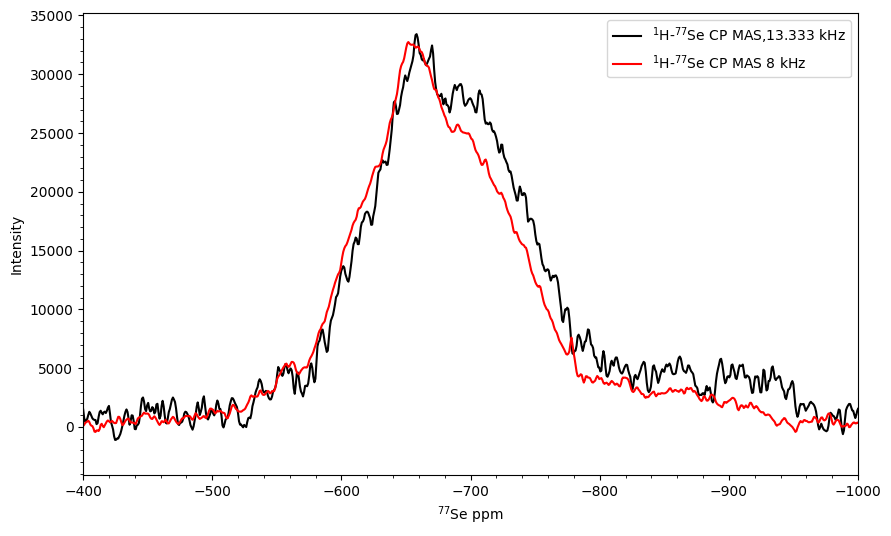

In [7]:
#se NMR data prepare for Cluster 408 nm
#se cp ( 246, 13.333khz ,ns=256)

#cp(247, 8khz, ns=256)
bas_dir=os.path.dirname('/Users/yunyao_1/Documents/Experiments_Data/data/CdSe_DNP/Yunyao')
path1_list = ['Yunyao','246','pdata','1']
data_path1 = os.path.join(bas_dir, *path1_list)
path2_list = ['Yunyao','247','pdata','1']
data_path2 = os.path.join(bas_dir, *path2_list)
#print(data_path)

dic1, data1=ng.bruker.read_pdata(data_path1)
dic2, data2=ng.bruker.read_pdata(data_path2)
udic1=ng.bruker.guess_udic(dic1,data1)
uc1=ng.fileiobase.uc_from_udic(udic1)
ppm1=uc1.ppm_scale()
udic2=ng.bruker.guess_udic(dic2,data2)
uc2=ng.fileiobase.uc_from_udic(udic2)
ppm2=uc2.ppm_scale()


fig,ax=plt.subplots(figsize=(10, 6))
ax.plot(ppm1,data1*3,'k-',label='$^{1}$H-$^{77}$Se CP MAS,13.333 kHz')
ax.plot(ppm2,data2,'r-',label='$^{1}$H-$^{77}$Se CP MAS 8 kHz')

ax.set_xlabel('$^{77}$Se ppm')
ax.set_ylabel("Intensity")
ax.minorticks_on()  # Enable minor ticks on both x and y axes
#ax.set_title("Top Values from Each Group")
ax.set_xlim(-400, -1000)
plt.legend()
#plt.grid(True)
plt.show()
fig.savefig('/Users/yunyao_1/Dropbox/CdSe-data-owen/Figures/QD408nm_Se_CP_plot.pdf')